# COVID-19 Project
By Eng. Nazareth Lopez

Current questions:
    
    How many people have been infected? 
    How dangerous is the virus? 
    When will a vaccine be available? 
    How can the epidemic be contained, and the damages mitigated? 
    What is the economic impact? 
    What is the role of social media and local communities in the epidemic response?

Data sources: 
    
    https://www.who.int/emergencies/diseases/novel-coronavirus-2019
    https://www.imperial.ac.uk/jameel-institute/
    https://www.cdc.gov/coronavirus/2019-ncov/index.html?CDC_AA_refVal=https%3A%2F%2Fwww.cdc.gov%2Fcoronavirus%2Findex.html
    https://www.ecdc.europa.eu/en/novel-coronavirus-china
    https://coronavirus.jhu.edu/map.html
    

In [2]:
#Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
from datetime import datetime
import warnings

In [17]:
from datetime import datetime
from datetime import timedelta

In [359]:
# Github URL's
#confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
#deaths_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_url ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

In [56]:
confirmed = pd.read_csv(confirmed, error_bad_lines=False)

In [57]:
confirmed.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/19/20  3/20/20  3/21/20  3/22/20  \
0        0        0        0  ...       22       24       24       40   
1        0        0        0  ...       64       70       76       89   
2        0        0        0  ...       87       90      139      201   
3        0        0        0  ...       53       75       88      113   
4        0        0        0  ...        0        1        2        2   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  
0       40       74       84       94      110      110  
1      104      123      146      174      186      197  
2      230      264      302      367      409      454  
3      133      164      188      224      267      308  
4        3        3        3        4        4        5  

[5 rows x 71 columns]

In [105]:
deaths = pd.read_csv(deaths, error_bad_lines=False)

In [106]:
deaths.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/19/20  3/20/20  3/21/20  3/22/20  \
0        0        0        0  ...        0        0        0        1   
1        0        0        0  ...        2        2        2        2   
2        0        0        0  ...        9       11       15       17   
3        0        0        0  ...        0        0        0        1   
4        0        0        0  ...        0        0        0        0   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  
0        1        1        2        4        4        4  
1        4        5        5        6        8       10  
2       17       19       21       25       26       29  
3        1        1        1        3        3        3  
4        0        0        0        0        0        0  

[5 rows x 71 columns]

In [60]:
recovered = pd.read_csv(recovered, error_bad_lines=False)

In [61]:
recovered.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/19/20  3/20/20  3/21/20  3/22/20  \
0        0        0        0  ...        1        1        1        1   
1        0        0        0  ...        0        0        2        2   
2        0        0        0  ...       32       32       32       65   
3        0        0        0  ...        1        1        1        1   
4        0        0        0  ...        0        0        0        0   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  
0        1        1        2        2        2        2  
1        2       10       17       17       31       31  
2       65       24       65       29       29       31  
3        1        1        1        1        1        1  
4        0        0        0        0        0        0  

[5 rows x 71 columns]

Missing Data

In [62]:
confirmed.isnull()
#Missing Data will be ignored, as the dataset is really valuable. 
#Moreover, province state atributtes are not that important for the project perspective

Province/State  Country/Region    Lat   Long  1/22/20  1/23/20  1/24/20  \
0              True           False  False  False    False    False    False   
1              True           False  False  False    False    False    False   
2              True           False  False  False    False    False    False   
3              True           False  False  False    False    False    False   
4              True           False  False  False    False    False    False   
..              ...             ...    ...    ...      ...      ...      ...   
248            True           False  False  False    False    False    False   
249           False           False  False  False    False    False    False   
250           False           False  False  False    False    False    False   
251           False           False  False  False    False    False    False   
252            True           False  False  False    False    False    False   

     1/25/20  1/26/20  1/27/20  ...  3/19/20  3/20/20  3/21/20  3/22/20  \
0      False    False    False  ...    False    False    False    False   
1      False    False    False  ...    False    False    False    False   
2      False    False    False  ...    False    False    False    False   
3      False    False    False  ...    False    False    False    False   
4      False    False    False  ...    False    False    False    False   
..       ...      ...      ...  ...      ...      ...      ...      ...   
248    False    False    False  ...    False    False    False    False   
249    False    False    False  ...    False    False    False    False   
250    False    False    False  ...    False    False    False    False   
251    False    False    False  ...    False    False    False    False   
252    False    False    False  ...    False    False    False    False   

     3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  
0      False    False    False    False    False    False  
1      False    False    False    False    False    False  
2      False    False    False    False    False    False  
3      False    False    False    False    False    False  
4      False    False    False    False    False    False  
..       ...      ...      ...      ...      ...      ...  
248    False    False    False    False    False    False  
249    False    False    False    False    False    False  
250    False    False    False    False    False    False  
251    False    False    False    False    False    False  
252    False    False    False    False    False    False  

[253 rows x 71 columns]

In [63]:
print(confirmed[confirmed.isnull()])

    Province/State Country/Region  Lat  Long  1/22/20  1/23/20  1/24/20  \
0              NaN            NaN  NaN   NaN      NaN      NaN      NaN   
1              NaN            NaN  NaN   NaN      NaN      NaN      NaN   
2              NaN            NaN  NaN   NaN      NaN      NaN      NaN   
3              NaN            NaN  NaN   NaN      NaN      NaN      NaN   
4              NaN            NaN  NaN   NaN      NaN      NaN      NaN   
..             ...            ...  ...   ...      ...      ...      ...   
248            NaN            NaN  NaN   NaN      NaN      NaN      NaN   
249            NaN            NaN  NaN   NaN      NaN      NaN      NaN   
250            NaN            NaN  NaN   NaN      NaN      NaN      NaN   
251            NaN            NaN  NaN   NaN      NaN      NaN      NaN   
252            NaN            NaN  NaN   NaN      NaN      NaN      NaN   

     1/25/20  1/26/20  1/27/20  ...  3/19/20  3/20/20  3/21/20  3/22/20  \
0        NaN      NaN   

In [64]:
confirmed.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/19/20  3/20/20  3/21/20  3/22/20  \
0        0        0        0  ...       22       24       24       40   
1        0        0        0  ...       64       70       76       89   
2        0        0        0  ...       87       90      139      201   
3        0        0        0  ...       53       75       88      113   
4        0        0        0  ...        0        1        2        2   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  
0       40       74       84       94      110      110  
1      104      123      146      174      186      197  
2      230      264      302      367      409      454  
3      133      164      188      224      267      308  
4        3        3        3        4        4        5  

[5 rows x 71 columns]

In [65]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 71 columns):
Province/State    79 non-null object
Country/Region    253 non-null object
Lat               253 non-null float64
Long              253 non-null float64
1/22/20           253 non-null int64
1/23/20           253 non-null int64
1/24/20           253 non-null int64
1/25/20           253 non-null int64
1/26/20           253 non-null int64
1/27/20           253 non-null int64
1/28/20           253 non-null int64
1/29/20           253 non-null int64
1/30/20           253 non-null int64
1/31/20           253 non-null int64
2/1/20            253 non-null int64
2/2/20            253 non-null int64
2/3/20            253 non-null int64
2/4/20            253 non-null int64
2/5/20            253 non-null int64
2/6/20            253 non-null int64
2/7/20            253 non-null int64
2/8/20            253 non-null int64
2/9/20            253 non-null int64
2/10/20           253 non-null int64
2/

In [107]:
#Drop lat and long
#confirmed =confirmed.drop(['Lat','Long'], axis=1)
#recovered = recovered.drop(['Lat','Long'], axis=1)
deaths = deaths.drop(['Lat','Long'], axis=1)

In [72]:
 confirmed.head()

Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            NaN    Afghanistan        0        0        0        0        0   
1            NaN        Albania        0        0        0        0        0   
2            NaN        Algeria        0        0        0        0        0   
3            NaN        Andorra        0        0        0        0        0   
4            NaN         Angola        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  3/19/20  3/20/20  3/21/20  3/22/20  \
0        0        0        0  ...       22       24       24       40   
1        0        0        0  ...       64       70       76       89   
2        0        0        0  ...       87       90      139      201   
3        0        0        0  ...       53       75       88      113   
4        0        0        0  ...        0        1        2        2   

   3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  
0       40       74       84       94      110      110  
1      104      123      146      174      186      197  
2      230      264      302      367      409      454  
3      133      164      188      224      267      308  
4        3        3        3        4        4        5  

[5 rows x 69 columns]

#Changing attributtes 

In [73]:
#Using datetime module (already installed)

confirmed['Country/Region'] = confirmed['Country/Region'].astype('str')
confirmed['Province/State'] = confirmed['Province/State'].astype('str')


#Pivot Dates

In [108]:
# Unpivot #RCODE
#confirmed = confirmed.melt(id_vars=['Province/State','Country/Region'],var_name="Date",value_name="Cases")
deaths = deaths.melt(id_vars=["Province/State","Country/Region"],var_name="Date",value_name="Fatalities")
#recovered = recovered.melt(id_vars=["Province/State","Country/Region"],var_name="Date",value_name="Cases")


In [83]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16951 entries, 0 to 16950
Data columns (total 4 columns):
Province/State    16951 non-null object
Country/Region    16951 non-null object
Date              16951 non-null object
Cases             16951 non-null int64
dtypes: int64(1), object(3)
memory usage: 529.8+ KB


In [99]:
confirmed.head()

Province/State Country/Region     Date  Cases
0            nan    Afghanistan  1/22/20      0
1            nan        Albania  1/22/20      0
2            nan        Algeria  1/22/20      0
3            nan        Andorra  1/22/20      0
4            nan         Angola  1/22/20      0

In [102]:
recovered.head()

Province/State Country/Region     Date  Cases
0            NaN    Afghanistan  1/22/20      0
1            NaN        Albania  1/22/20      0
2            NaN        Algeria  1/22/20      0
3            NaN        Andorra  1/22/20      0
4            NaN         Angola  1/22/20      0

In [109]:
deaths.head()

Province/State Country/Region     Date  Fatalities
0            NaN    Afghanistan  1/22/20           0
1            NaN        Albania  1/22/20           0
2            NaN        Algeria  1/22/20           0
3            NaN        Andorra  1/22/20           0
4            NaN         Angola  1/22/20           0

Exploratory Analysis (EDA)

In [79]:
print("Number of Country_Region: ", confirmed['Country/Region'].nunique())

Number of Country_Region:  177


In [84]:
print("Dates go from day", max(confirmed['Date']), "to day", min(confirmed['Date']), ", a total of", confirmed['Date'].nunique(), "days")

Dates go from day 3/9/20 to day 1/22/20 , a total of 67 days


In [87]:
confirmed_country = confirmed.groupby(['Country/Region', 'Province/State']).agg({'Cases':['sum']})
print(confirmed_country)

                                  Cases
                                    sum
Country/Region     Province/State      
Afghanistan        nan              761
Albania            nan             1554
Algeria            nan             3017
Andorra            nan             1707
Angola             nan               27
...                                 ...
Venezuela          nan              907
Vietnam            nan             2327
West Bank and Gaza nan             1011
Zambia             nan               95
Zimbabwe           nan               31

[253 rows x 1 columns]


In [98]:
deaths.info()
deaths.head()
#deaths["Fatalities"] = deaths["Fatalities"].astype("int64")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33902 entries, 0 to 33901
Data columns (total 4 columns):
Province/State    10586 non-null object
Country/Region    33902 non-null object
Date              33902 non-null object
Fatalities        33902 non-null object
dtypes: object(4)
memory usage: 1.0+ MB


Province/State Country/Region  Date Fatalities
0            NaN    Afghanistan  Date    1/22/20
1            NaN        Albania  Date    1/22/20
2            NaN        Algeria  Date    1/22/20
3            NaN        Andorra  Date    1/22/20
4            NaN         Angola  Date    1/22/20

In [110]:
fatalities_country = deaths.groupby(['Country/Region', 'Province/State']).agg({'Fatalities':['sum']})
print(fatalities_country)

                                            Fatalities
                                                   sum
Country/Region Province/State                         
Australia      Australian Capital Territory          0
               New South Wales                      96
               Northern Territory                    0
               Queensland                            3
               South Australia                       0
...                                                ...
United Kingdom Channel Islands                       3
               Gibraltar                             0
               Isle of Man                           0
               Montserrat                            0
               Turks and Caicos Islands              0

[79 rows x 1 columns]


In [318]:
# Set style & figures inline
sns.set()
%matplotlib inline

Confirmed EDA 

In [334]:
# Import data & check it out
raw_data_confirmed = pd.read_csv(confirmed_url)
raw_data_confirmed.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/24/20  3/25/20  3/26/20  3/27/20  \
0        0        0        0  ...       74       84       94      110   
1        0        0        0  ...      123      146      174      186   
2        0        0        0  ...      264      302      367      409   
3        0        0        0  ...      164      188      224      267   
4        0        0        0  ...        3        3        4        4   

   3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  
0      110      120      170      174     237     273  
1      197      212      223      243     259     277  
2      454      511      584      716     847     986  
3      308      334      370      376     390     428  
4        5        7        7        7       8       8  

[5 rows x 76 columns]

In [338]:
# Group by region
data_day = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
data_day.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Afghanistan           0        0        0        0        0        0        0   
Albania               0        0        0        0        0        0        0   
Algeria               0        0        0        0        0        0        0   
Andorra               0        0        0        0        0        0        0   
Angola                0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  3/24/20  3/25/20  3/26/20  \
Country/Region                             ...                              
Afghanistan           0        0        0  ...       74       84       94   
Albania               0        0        0  ...      123      146      174   
Algeria               0        0        0  ...      264      302      367   
Andorra               0        0        0  ...      164      188      224   
Angola                0        0        0  ...        3        3        4   

                3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  
Country/Region                                                               
Afghanistan         110      110      120      170      174     237     273  
Albania             186      197      212      223      243     259     277  
Algeria             409      454      511      584      716     847     986  
Andorra             267      308      334      370      376     390     428  
Angola                4        5        7        7        7       8       8  

[5 rows x 72 columns]

In [339]:
df = data_day.transpose()
print(df)

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
1/22/20                   0        0        0        0       0   
1/23/20                   0        0        0        0       0   
1/24/20                   0        0        0        0       0   
1/25/20                   0        0        0        0       0   
1/26/20                   0        0        0        0       0   
...                     ...      ...      ...      ...     ...   
3/29/20                 120      212      511      334       7   
3/30/20                 170      223      584      370       7   
3/31/20                 174      243      716      376       7   
4/1/20                  237      259      847      390       8   
4/2/20                  273      277      986      428       8   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
1/22/20                           0          0        0          0        0   
1/23/20                           0          0   

In [340]:
# Melt data so that it is long
data = data_day.reset_index().melt(id_vars='Country/Region', var_name='Date')
data.head()

Country/Region     Date  value
0    Afghanistan  1/22/20      0
1        Albania  1/22/20      0
2        Algeria  1/22/20      0
3        Andorra  1/22/20      0
4         Angola  1/22/20      0

In [341]:
data.loc[(data.value < 1),'value'] = None
data.head()

Country/Region     Date  value
0    Afghanistan  1/22/20    NaN
1        Albania  1/22/20    NaN
2        Algeria  1/22/20    NaN
3        Andorra  1/22/20    NaN
4         Angola  1/22/20    NaN

In [342]:
df = data.pivot(index='Date', columns='Country/Region', values='value')
df.tail()

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
Date                                                             
3/7/20                  1.0      NaN     17.0      1.0     NaN   
3/8/20                  4.0      NaN     19.0      1.0     NaN   
3/9/20                  4.0      2.0     20.0      1.0     NaN   
4/1/20                237.0    259.0    847.0    390.0     8.0   
4/2/20                273.0    277.0    986.0    428.0     8.0   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
Date                                                                          
3/7/20                          NaN        8.0      1.0       63.0     79.0   
3/8/20                          NaN       12.0      1.0       76.0    104.0   
3/9/20                          NaN       12.0      1.0       91.0    131.0   
4/1/20                          7.0     1054.0    571.0     4862.0  10711.0   
4/2/20                          9.0     1133.0    663.0     5116.0  11129.0   

Country/Region  ...  Ukraine  United Arab Emirates  United Kingdom  Uruguay  \
Date            ...                                                           
3/7/20          ...      1.0                  45.0           207.0      NaN   
3/8/20          ...      1.0                  45.0           274.0      NaN   
3/9/20          ...      1.0                  45.0           322.0      NaN   
4/1/20          ...    794.0                 814.0         29865.0    338.0   
4/2/20          ...    897.0                1024.0         34173.0    350.0   

Country/Region  Uzbekistan  Venezuela  Vietnam  West Bank and Gaza  Zambia  \
Date                                                                         
3/7/20                 NaN        NaN     18.0                16.0     NaN   
3/8/20                 NaN        NaN     30.0                16.0     NaN   
3/9/20                 NaN        NaN     30.0                19.0     NaN   
4/1/20               181.0      143.0    218.0               134.0    36.0   
4/2/20               205.0      146.0    233.0               161.0    39.0   

Country/Region  Zimbabwe  
Date                      
3/7/20               NaN  
3/8/20               NaN  
3/9/20               NaN  
4/1/20               8.0  
4/2/20               9.0  

[5 rows x 181 columns]

In [343]:
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)
df.head()

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
Date                                                             
2020-01-22              NaN      NaN      NaN      NaN     NaN   
2020-01-23              NaN      NaN      NaN      NaN     NaN   
2020-01-24              NaN      NaN      NaN      NaN     NaN   
2020-01-25              NaN      NaN      NaN      NaN     NaN   
2020-01-26              NaN      NaN      NaN      NaN     NaN   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
Date                                                                          
2020-01-22                      NaN        NaN      NaN        NaN      NaN   
2020-01-23                      NaN        NaN      NaN        NaN      NaN   
2020-01-24                      NaN        NaN      NaN        NaN      NaN   
2020-01-25                      NaN        NaN      NaN        NaN      NaN   
2020-01-26                      NaN        NaN      NaN        4.0      NaN   

Country/Region  ...  Ukraine  United Arab Emirates  United Kingdom  Uruguay  \
Date            ...                                                           
2020-01-22      ...      NaN                   NaN             NaN      NaN   
2020-01-23      ...      NaN                   NaN             NaN      NaN   
2020-01-24      ...      NaN                   NaN             NaN      NaN   
2020-01-25      ...      NaN                   NaN             NaN      NaN   
2020-01-26      ...      NaN                   NaN             NaN      NaN   

Country/Region  Uzbekistan  Venezuela  Vietnam  West Bank and Gaza  Zambia  \
Date                                                                         
2020-01-22             NaN        NaN      NaN                 NaN     NaN   
2020-01-23             NaN        NaN      2.0                 NaN     NaN   
2020-01-24             NaN        NaN      2.0                 NaN     NaN   
2020-01-25             NaN        NaN      2.0                 NaN     NaN   
2020-01-26             NaN        NaN      2.0                 NaN     NaN   

Country/Region  Zimbabwe  
Date                      
2020-01-22           NaN  
2020-01-23           NaN  
2020-01-24           NaN  
2020-01-25           NaN  
2020-01-26           NaN  

[5 rows x 181 columns]

In [344]:
# Check out index
df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-02', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
               '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-03-01',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-02', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
      

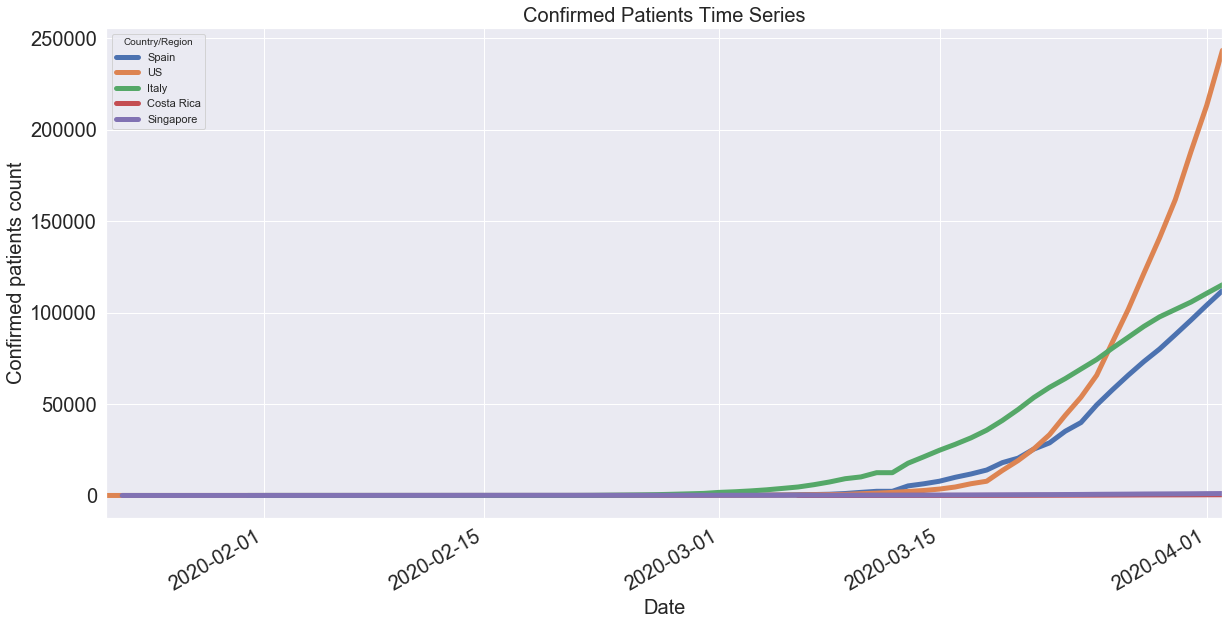

In [345]:
# Plot time series of several countries of interest
poi = ['Spain', 'US', 'Italy', 'Costa Rica', 'Singapore']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Confirmed patients count', fontsize=20);
plt.title('Confirmed Patients Time Series', fontsize=20);

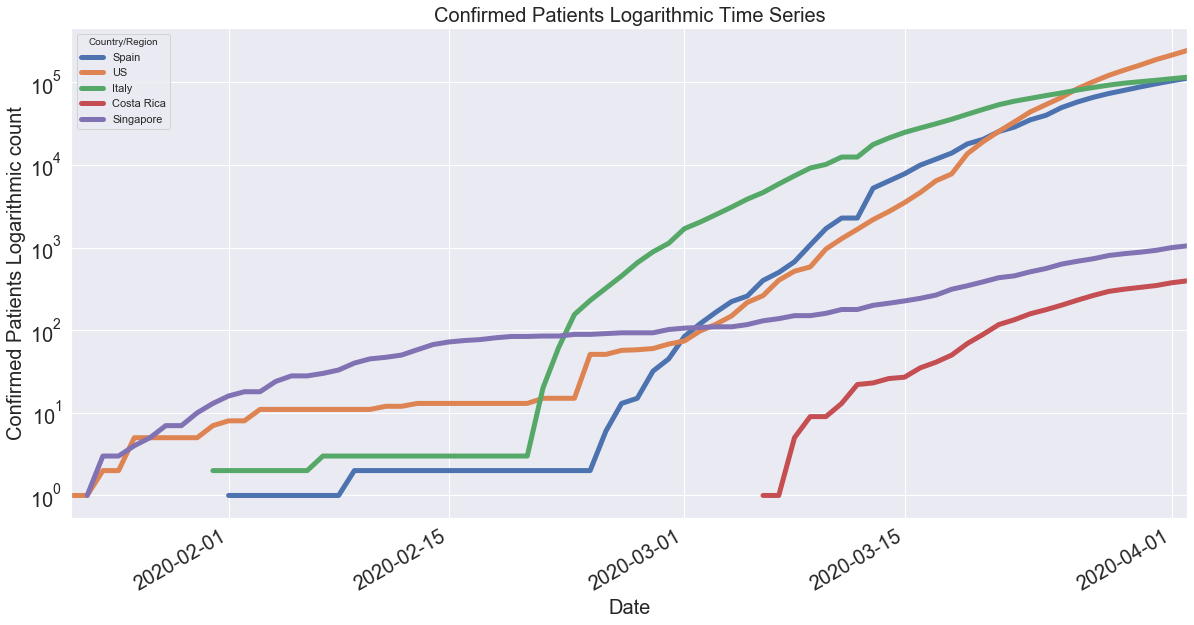

In [346]:

# Plot time series of several countries of interest
poi = ['Spain', 'US', 'Italy', 'Costa Rica', 'Singapore']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Confirmed Patients Logarithmic count', fontsize=20);
plt.title('Confirmed Patients Logarithmic Time Series', fontsize=20);

Deaths EDA

In [348]:
# Import data & check it out
raw_data_deaths = pd.read_csv(deaths_url)
raw_data_deaths.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/24/20  3/25/20  3/26/20  3/27/20  \
0        0        0        0  ...        1        2        4        4   
1        0        0        0  ...        5        5        6        8   
2        0        0        0  ...       19       21       25       26   
3        0        0        0  ...        1        1        3        3   
4        0        0        0  ...        0        0        0        0   

   3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  
0        4        4        4        4       4       6  
1       10       10       11       15      15      16  
2       29       31       35       44      58      86  
3        3        6        8       12      14      15  
4        0        2        2        2       2       2  

[5 rows x 76 columns]

In [349]:
# Group by region
data_day = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
df = data_day.transpose()
# Melt data so that it is long
data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')
#
data.loc[(data.value < 25),'value'] = None
# Pivot data to wide & index by date
df = data.pivot(index='date', columns='Country/Region', values='value')
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)

In [350]:
df.tail()

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
date                                                             
2020-03-07              NaN      NaN      NaN      NaN     NaN   
2020-03-08              NaN      NaN      NaN      NaN     NaN   
2020-03-09              NaN      NaN      NaN      NaN     NaN   
2020-04-01              NaN      NaN     58.0      NaN     NaN   
2020-04-02              NaN      NaN     86.0      NaN     NaN   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
date                                                                          
2020-03-07                      NaN        NaN      NaN        NaN      NaN   
2020-03-08                      NaN        NaN      NaN        NaN      NaN   
2020-03-09                      NaN        NaN      NaN        NaN      NaN   
2020-04-01                      NaN       28.0      NaN        NaN    146.0   
2020-04-02                      NaN       36.0      NaN        NaN    158.0   

Country/Region  ...  Ukraine  United Arab Emirates  United Kingdom  Uruguay  \
date            ...                                                           
2020-03-07      ...      NaN                   NaN             NaN      NaN   
2020-03-08      ...      NaN                   NaN             NaN      NaN   
2020-03-09      ...      NaN                   NaN             NaN      NaN   
2020-04-01      ...      NaN                   NaN          2357.0      NaN   
2020-04-02      ...      NaN                   NaN          2926.0      NaN   

Country/Region  Uzbekistan  Venezuela  Vietnam  West Bank and Gaza  Zambia  \
date                                                                         
2020-03-07             NaN        NaN      NaN                 NaN     NaN   
2020-03-08             NaN        NaN      NaN                 NaN     NaN   
2020-03-09             NaN        NaN      NaN                 NaN     NaN   
2020-04-01             NaN        NaN      NaN                 NaN     NaN   
2020-04-02             NaN        NaN      NaN                 NaN     NaN   

Country/Region  Zimbabwe  
date                      
2020-03-07           NaN  
2020-03-08           NaN  
2020-03-09           NaN  
2020-04-01           NaN  
2020-04-02           NaN  

[5 rows x 181 columns]

Text(0.5, 1.0, 'Deaths Patients Time Series')

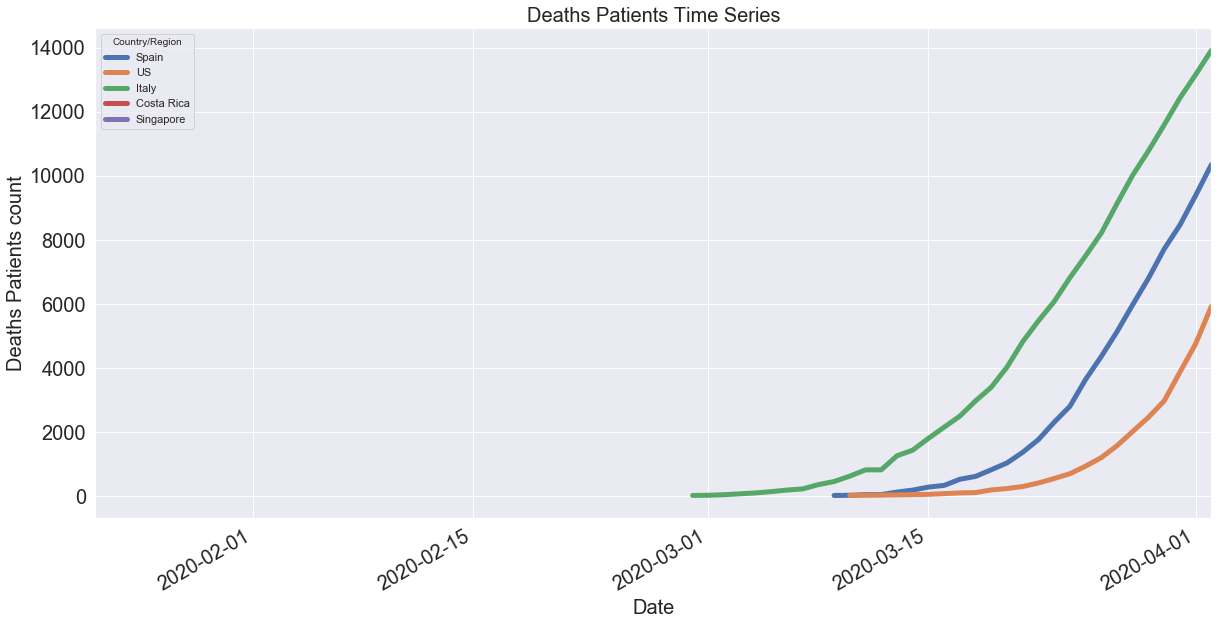

In [352]:
# Plot time series of several countries of interest
poi = ['Spain', 'US', 'Italy', 'Costa Rica', 'Singapore']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20)

In [353]:
df.dropna(axis=1, how='all', inplace=True)
df.head()

Country/Region  Algeria  Argentina  Austria  Belgium  Brazil  Canada  China  \
date                                                                          
2020-01-22          NaN        NaN      NaN      NaN     NaN     NaN    NaN   
2020-01-23          NaN        NaN      NaN      NaN     NaN     NaN    NaN   
2020-01-24          NaN        NaN      NaN      NaN     NaN     NaN   26.0   
2020-01-25          NaN        NaN      NaN      NaN     NaN     NaN   42.0   
2020-01-26          NaN        NaN      NaN      NaN     NaN     NaN   56.0   

Country/Region  Czechia  Denmark  Dominican Republic  ...  Romania  Russia  \
date                                                  ...                    
2020-01-22          NaN      NaN                 NaN  ...      NaN     NaN   
2020-01-23          NaN      NaN                 NaN  ...      NaN     NaN   
2020-01-24          NaN      NaN                 NaN  ...      NaN     NaN   
2020-01-25          NaN      NaN                 NaN  ...      NaN     NaN   
2020-01-26          NaN      NaN                 NaN  ...      NaN     NaN   

Country/Region  San Marino  Serbia  Spain  Sweden  Switzerland  Turkey  US  \
date                                                                         
2020-01-22             NaN     NaN    NaN     NaN          NaN     NaN NaN   
2020-01-23             NaN     NaN    NaN     NaN          NaN     NaN NaN   
2020-01-24             NaN     NaN    NaN     NaN          NaN     NaN NaN   
2020-01-25             NaN     NaN    NaN     NaN          NaN     NaN NaN   
2020-01-26             NaN     NaN    NaN     NaN          NaN     NaN NaN   

Country/Region  United Kingdom  
date                            
2020-01-22                 NaN  
2020-01-23                 NaN  
2020-01-24                 NaN  
2020-01-25                 NaN  
2020-01-26                 NaN  

[5 rows x 46 columns]

In [354]:
df = df.sort_index()
df1 = df.reset_index().drop(['date'], axis=1)
df1.head()

Country/Region  Algeria  Argentina  Austria  Belgium  Brazil  Canada  China  \
0                   NaN        NaN      NaN      NaN     NaN     NaN    NaN   
1                   NaN        NaN      NaN      NaN     NaN     NaN    NaN   
2                   NaN        NaN      NaN      NaN     NaN     NaN   26.0   
3                   NaN        NaN      NaN      NaN     NaN     NaN   42.0   
4                   NaN        NaN      NaN      NaN     NaN     NaN   56.0   

Country/Region  Czechia  Denmark  Dominican Republic  ...  Romania  Russia  \
0                   NaN      NaN                 NaN  ...      NaN     NaN   
1                   NaN      NaN                 NaN  ...      NaN     NaN   
2                   NaN      NaN                 NaN  ...      NaN     NaN   
3                   NaN      NaN                 NaN  ...      NaN     NaN   
4                   NaN      NaN                 NaN  ...      NaN     NaN   

Country/Region  San Marino  Serbia  Spain  Sweden  Switzerland  Turkey  US  \
0                      NaN     NaN    NaN     NaN          NaN     NaN NaN   
1                      NaN     NaN    NaN     NaN          NaN     NaN NaN   
2                      NaN     NaN    NaN     NaN          NaN     NaN NaN   
3                      NaN     NaN    NaN     NaN          NaN     NaN NaN   
4                      NaN     NaN    NaN     NaN          NaN     NaN NaN   

Country/Region  United Kingdom  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  

[5 rows x 46 columns]

In [355]:
for col in df1.columns:
    print(col, df1[col].first_valid_index())
    df1[col] = df1[col].shift(-df1[col].first_valid_index())

Algeria 64
Argentina 69
Austria 62
Belgium 58
Brazil 60
Canada 61
China 2
Czechia 69
Denmark 62
Dominican Republic 66
Ecuador 62
Egypt 65
France 48
Germany 56
Greece 64
India 67
Indonesia 57
Iran 36
Iraq 62
Ireland 66
Israel 70
Italy 38
Japan 54
Korea, South 40
Luxembourg 70
Malaysia 65
Mexico 69
Morocco 66
Netherlands 55
Norway 67
Pakistan 69
Panama 69
Peru 69
Philippines 60
Poland 68
Portugal 62
Romania 65
Russia 71
San Marino 68
Serbia 70
Spain 47
Sweden 61
Switzerland 55
Turkey 60
US 48
United Kingdom 54


In [356]:
df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))


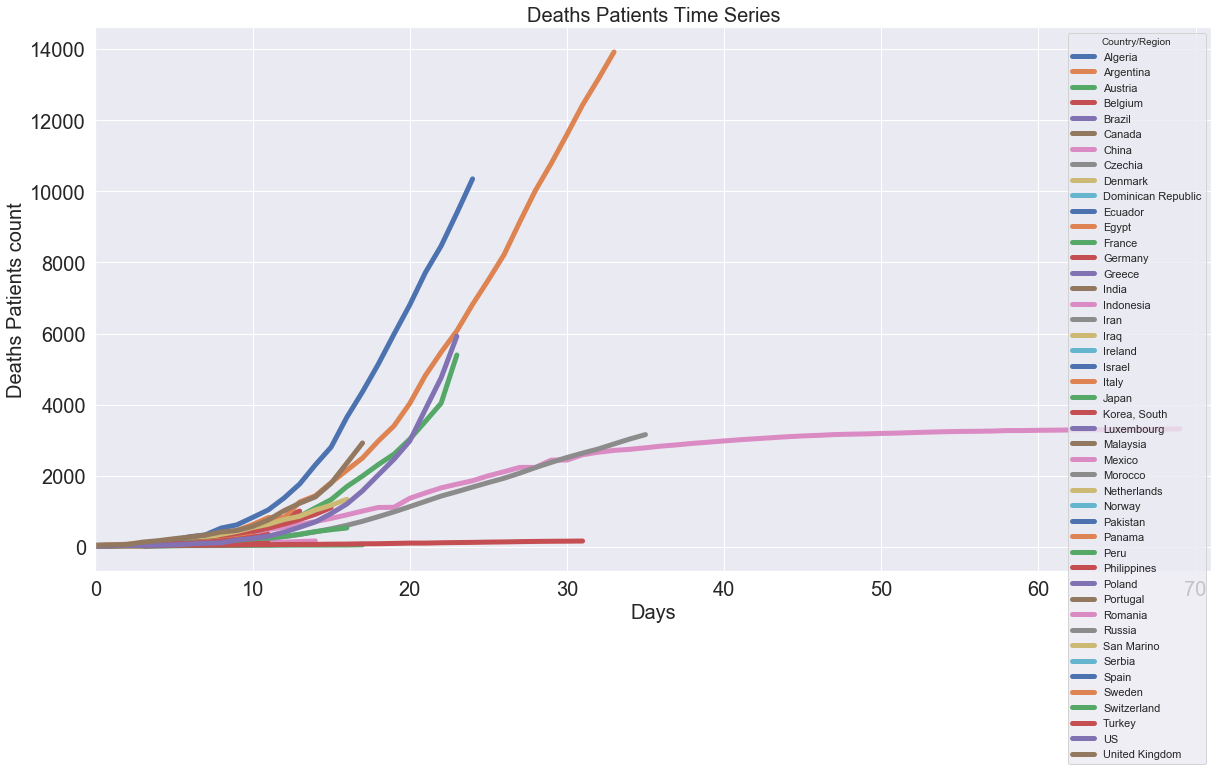

In [357]:
# Plot time series of several countries of interest
df2.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20);
plt.title('Deaths Patients Time Series', fontsize=20);

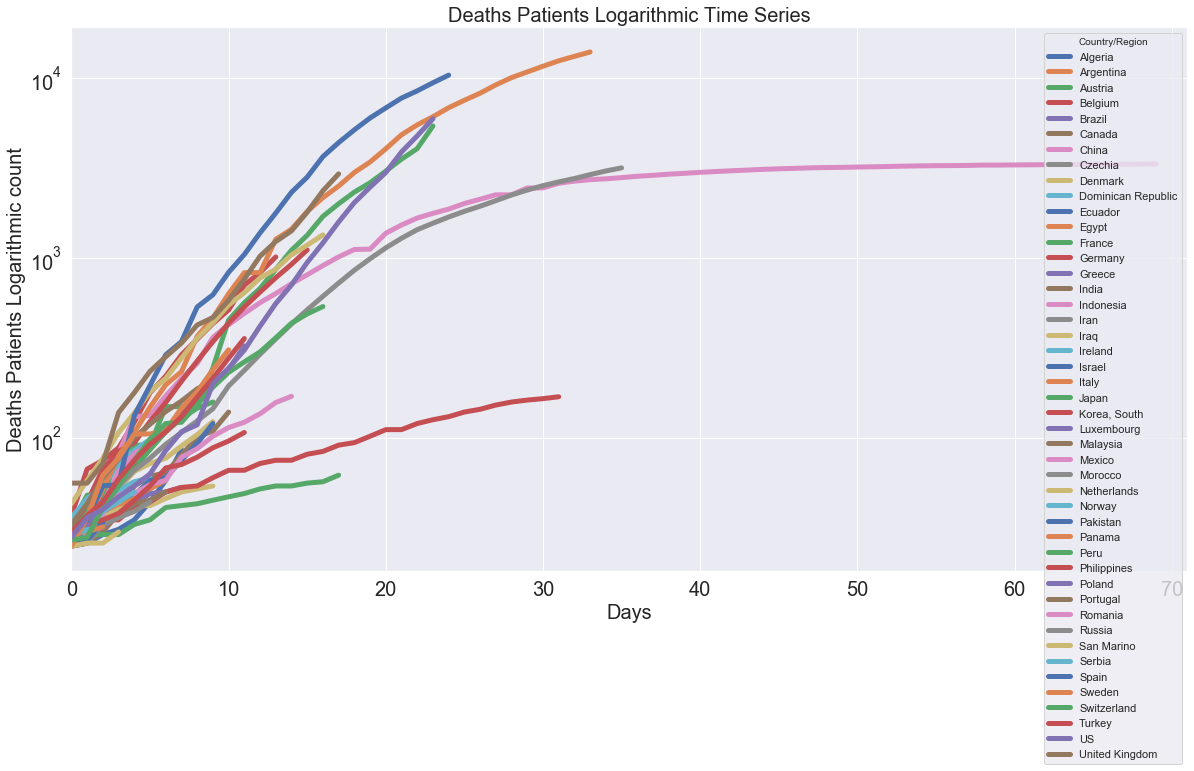

In [358]:
# Plot time series of several countries of interest
df2.plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients Logarithmic count', fontsize=20);
plt.title('Deaths Patients Logarithmic Time Series', fontsize=20);

Recovered EDA

In [360]:
# Import data & check it out
raw_data_recovered = pd.read_csv(recovered_url)
raw_data_recovered.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/24/20  3/25/20  3/26/20  3/27/20  \
0        0        0        0  ...        1        2        2        2   
1        0        0        0  ...       10       17       17       31   
2        0        0        0  ...       24       65       29       29   
3        0        0        0  ...        1        1        1        1   
4        0        0        0  ...        0        0        0        0   

   3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  
0        2        2        2        5       5      10  
1       31       33       44       52      67      76  
2       31       31       37       46      61      61  
3        1        1       10       10      10      10  
4        0        0        0        1       1       1  

[5 rows x 76 columns]

In [362]:
# Group by region
data_day = raw_data_recovered.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
df = data_day.transpose()
# Melt data so that it is long
data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')
#
data.loc[(data.value < 25),'value'] = None
# Pivot data to wide & index by date
df = data.pivot(index='date', columns='Country/Region', values='value')
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)

Text(0.5, 1.0, 'Recovered Patients Time Series')

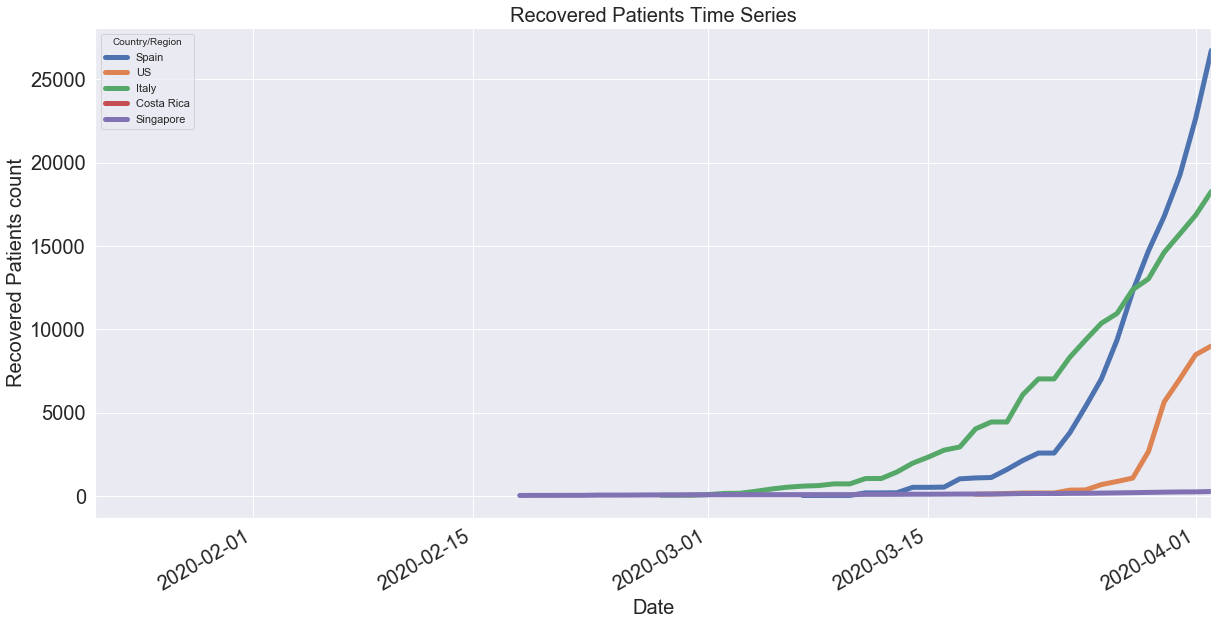

In [364]:
# Plot time series of several countries of interest
poi = ['Spain', 'US', 'Italy', 'Costa Rica', 'Singapore']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Recovered Patients count', fontsize=20);
plt.title('Recovered Patients Time Series', fontsize=20)

In [366]:
# Function to manipulate the data
def data_manipulation(df):
    df.dropna(axis=1, how='all', inplace=True)
    df = df.sort_index()
    df1 = df.reset_index().drop(['date'], axis=1)
    
    for col in df1.columns:
        print(col, df1[col].first_valid_index())
        df1[col] = df1[col].shift(-df1[col].first_valid_index())
        
    df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))
    return df2

In [367]:
clean_df = data_manipulation(df)


Albania 65
Algeria 57
Argentina 62
Armenia 65
Australia 57
Austria 64
Azerbaijan 68
Bahrain 49
Bangladesh 69
Belarus 63
Belgium 56
Brazil 68
Brunei 66
Bulgaria 71
Burkina Faso 68
Cambodia 70
Canada 62
Chile 65
China 0
Colombia 69
Croatia 65
Cyprus 70
Czechia 68
Denmark 62
Diamond Princess 44
Ecuador 69
Egypt 49
Estonia 69
Finland 71
France 60
Georgia 71
Germany 49
Ghana 69
Greece 62
Hungary 64
Iceland 60
India 60
Indonesia 60
Iran 35
Iraq 52
Israel 59
Italy 36
Japan 38
Jordan 68
Kazakhstan 70
Korea, South 38
Kuwait 59
Latvia 71
Lebanon 65
Luxembourg 65
Malaysia 49
Mexico 68
Morocco 70
Netherlands 67
New Zealand 64
Norway 71
Oman 68
Pakistan 66
Peru 68
Philippines 63
Poland 70
Portugal 64
Qatar 59
Romania 57
Russia 63
Saudi Arabia 62
Senegal 67
Singapore 27
Slovenia 71
South Africa 65
Spain 45
Sweden 70
Switzerland 60
Taiwan* 57
Thailand 37
Turkey 63
US 56
United Arab Emirates 56
United Kingdom 55
Uruguay 69
Uzbekistan 71
Venezuela 65
Vietnam 67


In [368]:
clean_df.head()


Country/Region  Albania  Algeria  Argentina  Armenia  Australia  Austria  \
0                  31.0     32.0       52.0     28.0       26.0    112.0   
1                  31.0     32.0       52.0     30.0       26.0    225.0   
2                  33.0     32.0       63.0     30.0       26.0    225.0   
3                  44.0     65.0       72.0     30.0       88.0    479.0   
4                  52.0     65.0       72.0     30.0       88.0    636.0   

Country/Region  Azerbaijan  Bahrain  Bangladesh  Belarus  ...  Taiwan*  \
0                     26.0     35.0        25.0     29.0  ...     26.0   
1                     26.0     35.0        25.0     29.0  ...     26.0   
2                     26.0     44.0        25.0     32.0  ...     28.0   
3                     26.0     44.0         NaN     32.0  ...     28.0   
4                      NaN     60.0         NaN     32.0  ...     28.0   

Country/Region  Thailand  Turkey     US  United Arab Emirates  United Kingdom  \
0                   28.0    26.0  105.0                  26.0            53.0   
1                   28.0    26.0  121.0                  31.0            67.0   
2                   28.0    42.0  147.0                  31.0            67.0   
3                   31.0    70.0  176.0                  38.0            67.0   
4                   31.0   105.0  178.0                  38.0            67.0   

Country/Region  Uruguay  Uzbekistan  Venezuela  Vietnam  
0                  41.0        25.0       31.0     25.0  
1                  41.0         NaN       39.0     55.0  
2                  62.0         NaN       39.0     58.0  
3                   NaN         NaN       39.0     63.0  
4                   NaN         NaN       39.0     75.0  

[5 rows x 83 columns]

In [370]:

# Function to plot time series of several countries of interest
def plot_time_series(df, plot_title, x_label, y_label, isLogY=False):
    df.plot(figsize=(20,10), linewidth=5, fontsize=20, logy=isLogY)
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

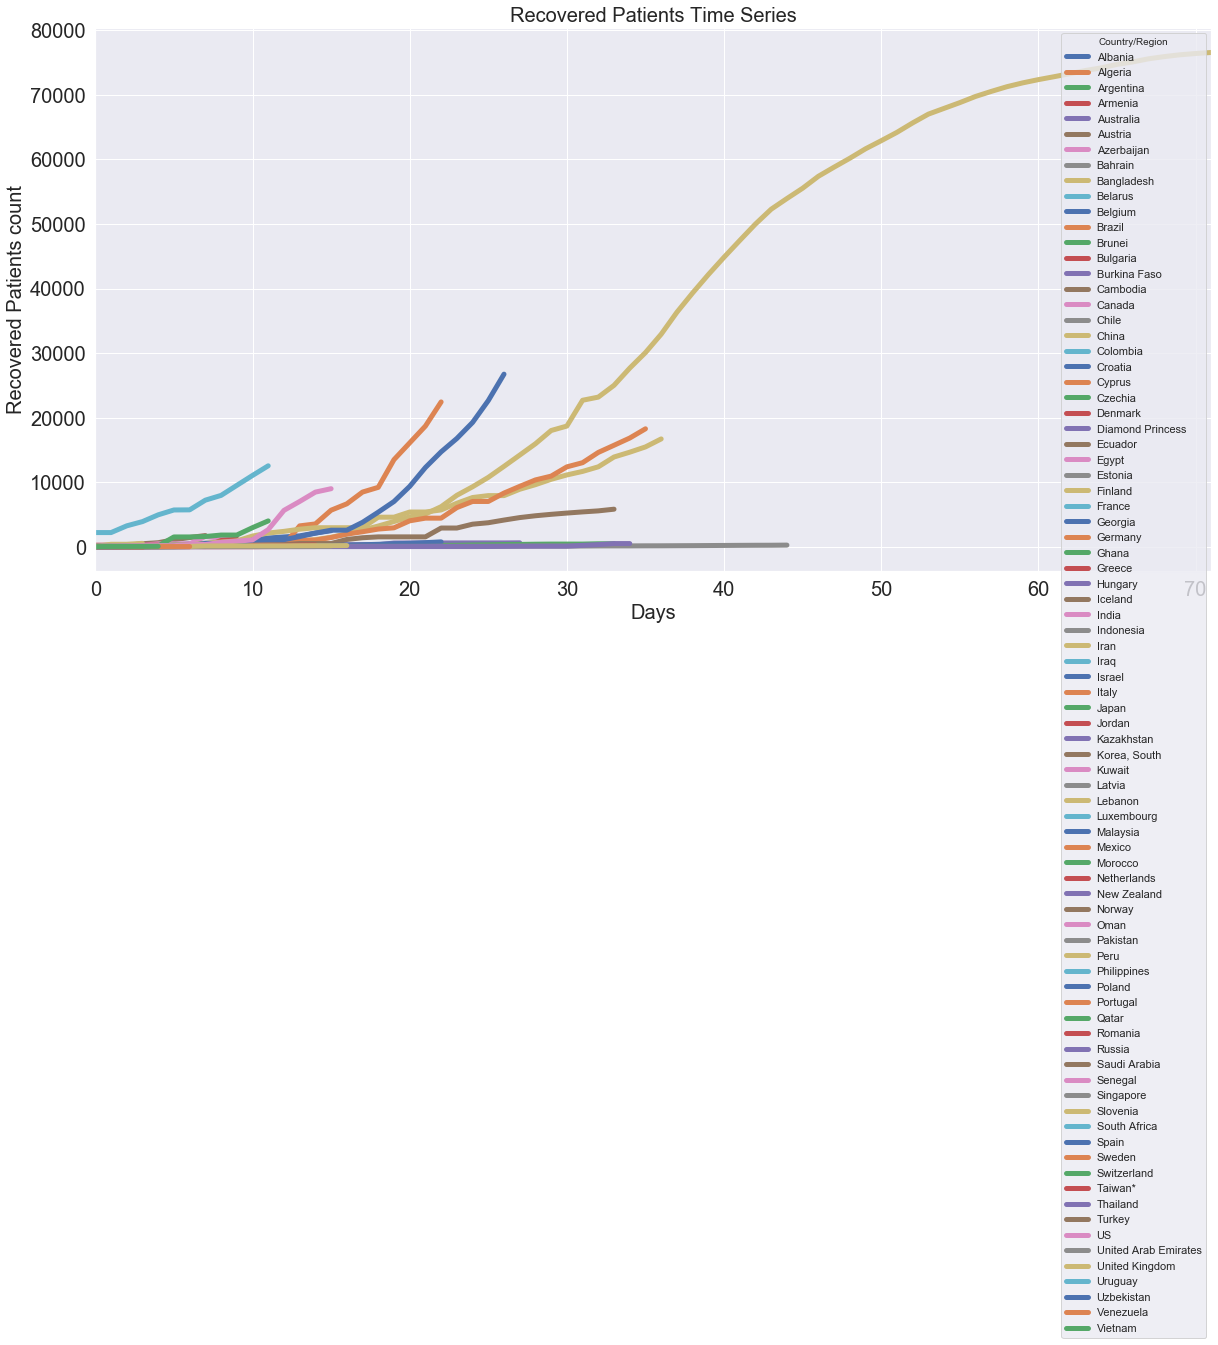

In [371]:
plot_time_series(clean_df, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', False)

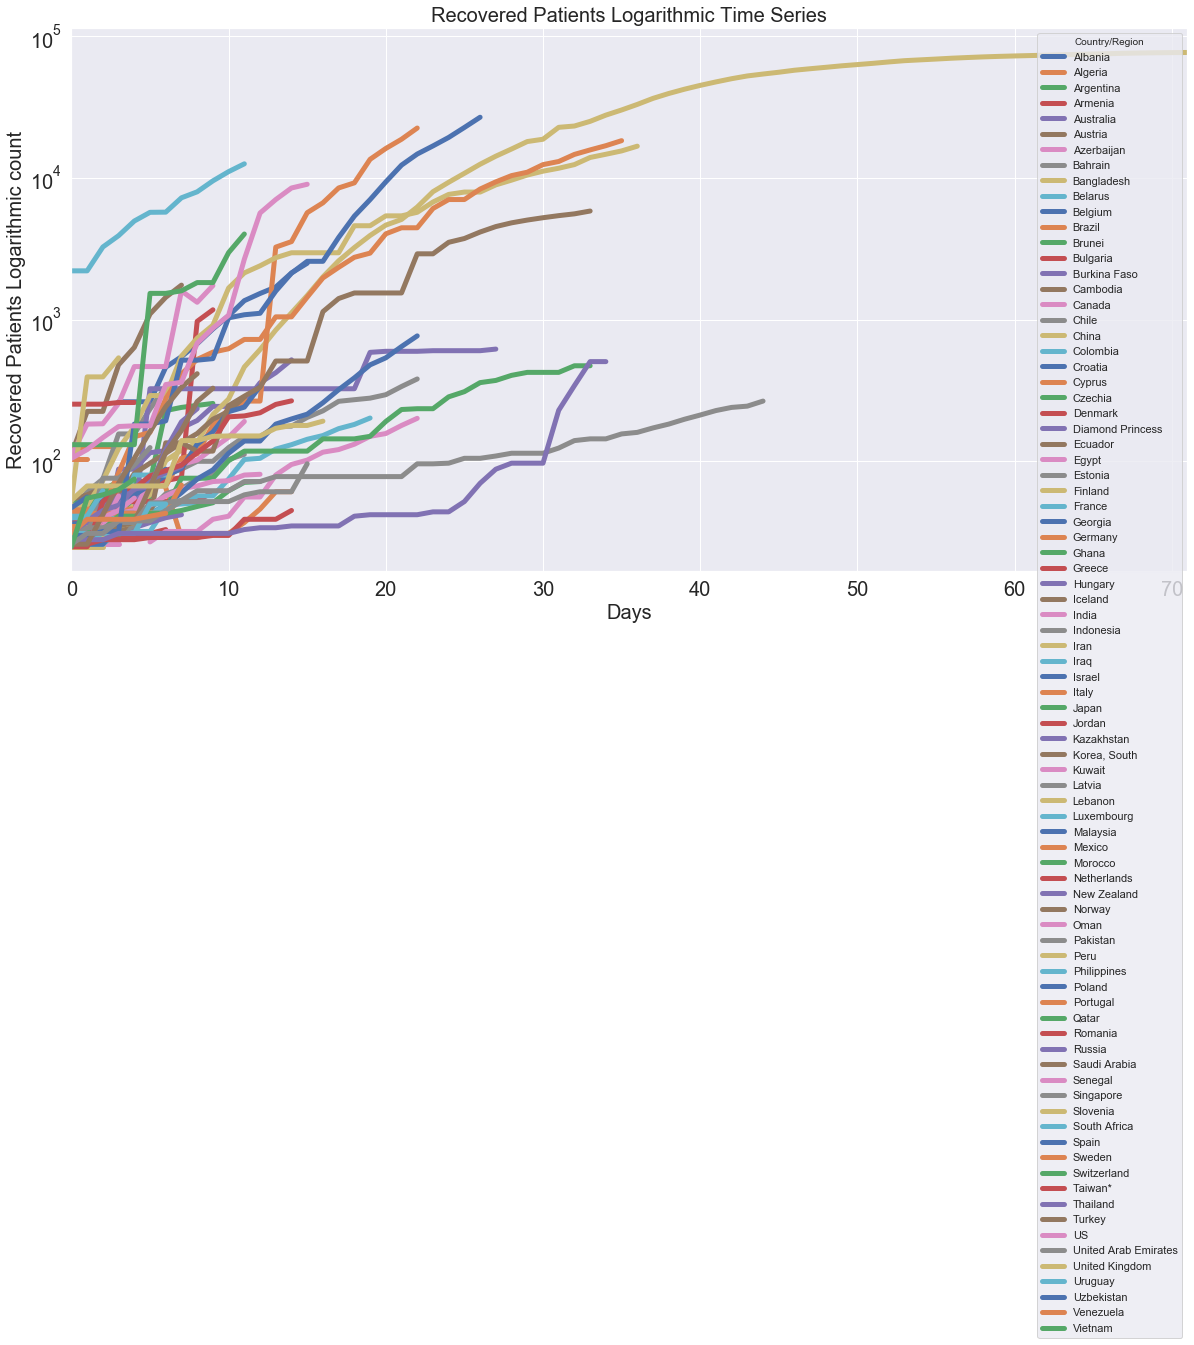

In [372]:
plot_time_series(clean_df, 'Recovered Patients Logarithmic Time Series', 'Days', 'Recovered Patients Logarithmic count', True)

Text(0.5, 0, 'Date')

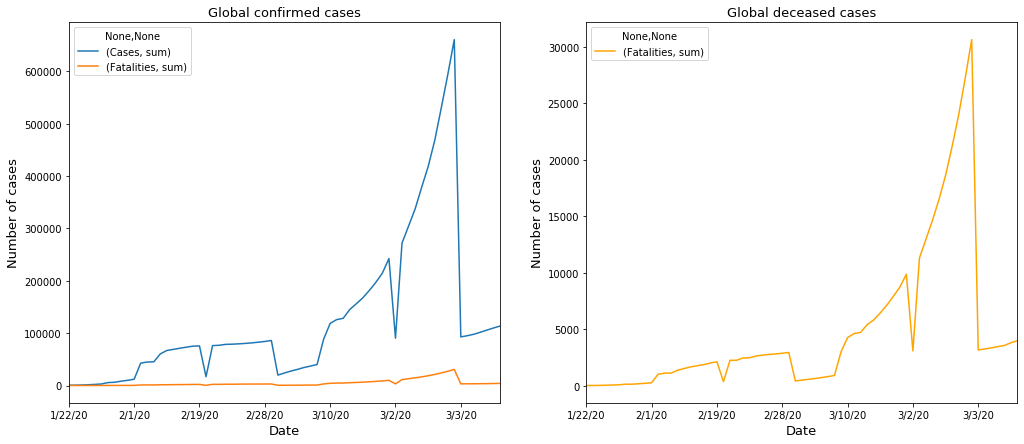

In [111]:
confirmed_total_date = confirmed.groupby(['Date']).agg({'Cases':['sum']})
fatalities_total_date = deaths.groupby(['Date']).agg({'Fatalities':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

In [114]:
#confirmed_country_noChina = confirmed[confirmed['Country/Region']!='China'].groupby(['Country/Region', 'Province/State']).agg({'Cases':['sum']})
fatalities_country_noChina = deaths[deaths['Country/Region']!='China'].groupby(['Country/Region', 'Province/State']).agg({'Fatalities':['sum']})
print(confirmed_country_noChina)

                                  Cases
                                    sum
Country/Region     Province/State      
Afghanistan        nan              761
Albania            nan             1554
Algeria            nan             3017
Andorra            nan             1707
Angola             nan               27
...                                 ...
Venezuela          nan              907
Vietnam            nan             2327
West Bank and Gaza nan             1011
Zambia             nan               95
Zimbabwe           nan               31

[220 rows x 1 columns]


Text(0.5, 0, 'Date')

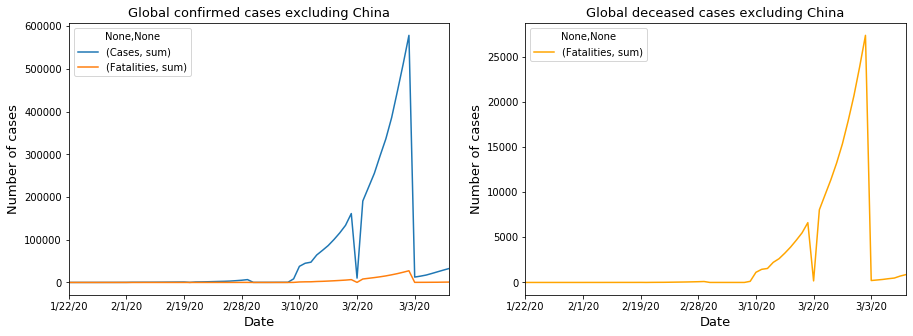

In [115]:
confirmed_total_date_noChina = confirmed[confirmed['Country/Region']!='China'].groupby(['Date']).agg({'Cases':['sum']})
fatalities_total_date_noChina = deaths[deaths['Country/Region']!='China'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

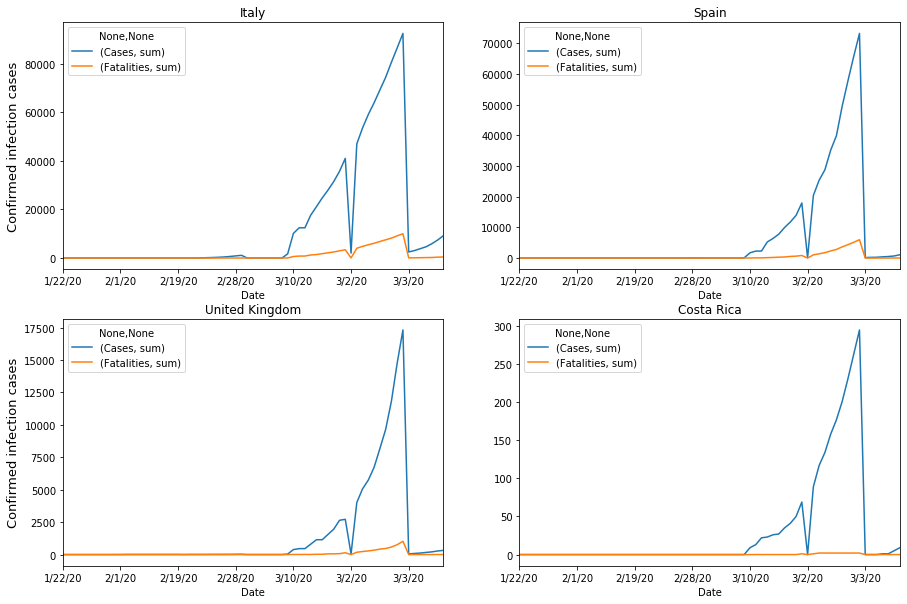

In [118]:
#confirmed_country_Italy = train[train['Country_Region']=='Italy'].groupby(['Country_Region', 'Province_State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_Italy = train[train['Country_Region']=='Italy'].groupby(['Country_Region', 'Province_State']).agg({'Fatalities':['sum']})
confirmed_total_date_Italy = confirmed[confirmed['Country/Region']=='Italy'].groupby(['Date']).agg({'Cases':['sum']})
fatalities_total_date_Italy = deaths[deaths['Country/Region']=='Italy'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#confirmed_country_Spain = train[train['Country_Region']=='Spain'].groupby(['Country_Region', 'Province_State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_Spain = train[train['Country_Region']=='Spain'].groupby(['Country_Region', 'Province_State']).agg({'Fatalities':['sum']})
confirmed_total_date_Spain = confirmed[confirmed['Country/Region']=='Spain'].groupby(['Date']).agg({'Cases':['sum']})
fatalities_total_date_Spain = deaths[deaths['Country/Region']=='Spain'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)

#confirmed_country_UK = train[train['Country_Region']=='United Kingdom'].groupby(['Country_Region', 'Province_State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_UK = train[train['Country_Region']=='United Kingdom'].groupby(['Country_Region', 'Province_State']).agg({'Fatalities':['sum']})
confirmed_total_date_UK = confirmed[confirmed['Country/Region']=='United Kingdom'].groupby(['Date']).agg({'Cases':['sum']})
fatalities_total_date_UK = deaths[deaths['Country/Region']=='United Kingdom'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_UK = confirmed_total_date_UK.join(fatalities_total_date_UK)

#confirmed_country_Australia = train[train['Country_Region']=='Australia'].groupby(['Country_Region', 'Province_State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_Australia = train[train['Country_Region']=='Australia'].groupby(['Country_Region', 'Province_State']).agg({'Fatalities':['sum']})
confirmed_total_date_Australia = confirmed[confirmed['Country/Region']=='Australia'].groupby(['Date']).agg({'Cases':['sum']})
fatalities_total_date_Australia = deaths[deaths['Country/Region']=='Australia'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)

#confirmed_country_CostaRica = confirmed[confirmed['Country/Region']=='Costa Rica'].groupby(['Country/Region', 'Province/State']).agg({'Cases':['sum']})
#fatalities_country_CostaRica = deaths[deaths['Country/Region']=='Costa Rica'].groupby(['Country/Region', 'Province/State']).agg({'Fatalities':['sum']})
confirmed_total_date_CostaRica = confirmed[confirmed['Country/Region']=='Costa Rica'].groupby(['Date']).agg({'Cases':['sum']})
fatalities_total_date_CostaRica = deaths[deaths['Country/Region']=='Costa Rica'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_CostaRica = confirmed_total_date_CostaRica.join(fatalities_total_date_CostaRica)

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_UK.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 4)
total_date_CostaRica.plot(ax=plt.gca(), title='Costa Rica')

#What is happening with the data of 3/2/2020????

We are going to review again missing data

In [122]:
print(confirmed.dropna())


                 Province/State  Country/Region     Date  Cases
0                           nan     Afghanistan  1/22/20      0
1                           nan         Albania  1/22/20      0
2                           nan         Algeria  1/22/20      0
3                           nan         Andorra  1/22/20      0
4                           nan          Angola  1/22/20      0
...                         ...             ...      ...    ...
16946                       nan           Burma  3/28/20      8
16947                  Anguilla  United Kingdom  3/28/20      2
16948    British Virgin Islands  United Kingdom  3/28/20      2
16949  Turks and Caicos Islands  United Kingdom  3/28/20      4
16950                       nan      MS Zaandam  3/28/20      2

[16951 rows x 4 columns]


In [123]:
confirmed_drop = confirmed.dropna()

In [155]:
print(confirmed[confirmed['Date']=='3/2/20'])

                 Province/State  Country/Region    Date  Cases
10120                       nan     Afghanistan  3/2/20      1
10121                       nan         Albania  3/2/20      0
10122                       nan         Algeria  3/2/20      3
10123                       nan         Andorra  3/2/20      1
10124                       nan          Angola  3/2/20      0
...                         ...             ...     ...    ...
10368                       nan           Burma  3/2/20      0
10369                  Anguilla  United Kingdom  3/2/20      0
10370    British Virgin Islands  United Kingdom  3/2/20      0
10371  Turks and Caicos Islands  United Kingdom  3/2/20      0
10372                       nan      MS Zaandam  3/2/20      0

[253 rows x 4 columns]


In [156]:
print(confirmed[confirmed['Date']=='2/28/20'])

                Province/State  Country/Region     Date  Cases
9361                       nan     Afghanistan  2/28/20      1
9362                       nan         Albania  2/28/20      0
9363                       nan         Algeria  2/28/20      1
9364                       nan         Andorra  2/28/20      0
9365                       nan          Angola  2/28/20      0
...                        ...             ...      ...    ...
9609                       nan           Burma  2/28/20      0
9610                  Anguilla  United Kingdom  2/28/20      0
9611    British Virgin Islands  United Kingdom  2/28/20      0
9612  Turks and Caicos Islands  United Kingdom  2/28/20      0
9613                       nan      MS Zaandam  2/28/20      0

[253 rows x 4 columns]


In [131]:
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16951 entries, 0 to 16950
Data columns (total 4 columns):
Province/State    16951 non-null object
Country/Region    16951 non-null object
Date              16951 non-null object
Cases             16951 non-null int64
dtypes: int64(1), object(3)
memory usage: 529.8+ KB


In [154]:
#print(confirmed.loc[confirmed['Date'] == '2/28/2020', ['Date']]
#confirmed[confirmed.Date.isin(['2/19/2020'])] 
confirmed['Date'] = confirmed['Date'].astype('str')
print(confirmed[confirmed['Date'].str.match('2/1/20')])


                Province/State  Country/Region    Date  Cases
2530                       nan     Afghanistan  2/1/20      0
2531                       nan         Albania  2/1/20      0
2532                       nan         Algeria  2/1/20      0
2533                       nan         Andorra  2/1/20      0
2534                       nan          Angola  2/1/20      0
...                        ...             ...     ...    ...
2778                       nan           Burma  2/1/20      0
2779                  Anguilla  United Kingdom  2/1/20      0
2780    British Virgin Islands  United Kingdom  2/1/20      0
2781  Turks and Caicos Islands  United Kingdom  2/1/20      0
2782                       nan      MS Zaandam  2/1/20      0

[253 rows x 4 columns]


Plot again

In [125]:
confirmed_drop_country = confirmed_drop.groupby(['Country/Region', 'Province/State']).agg({'Cases':['sum']})
print(confirmed_drop_country)

                                  Cases
                                    sum
Country/Region     Province/State      
Afghanistan        nan              761
Albania            nan             1554
Algeria            nan             3017
Andorra            nan             1707
Angola             nan               27
...                                 ...
Venezuela          nan              907
Vietnam            nan             2327
West Bank and Gaza nan             1011
Zambia             nan               95
Zimbabwe           nan               31

[253 rows x 1 columns]


Text(0.5, 0, 'Date')

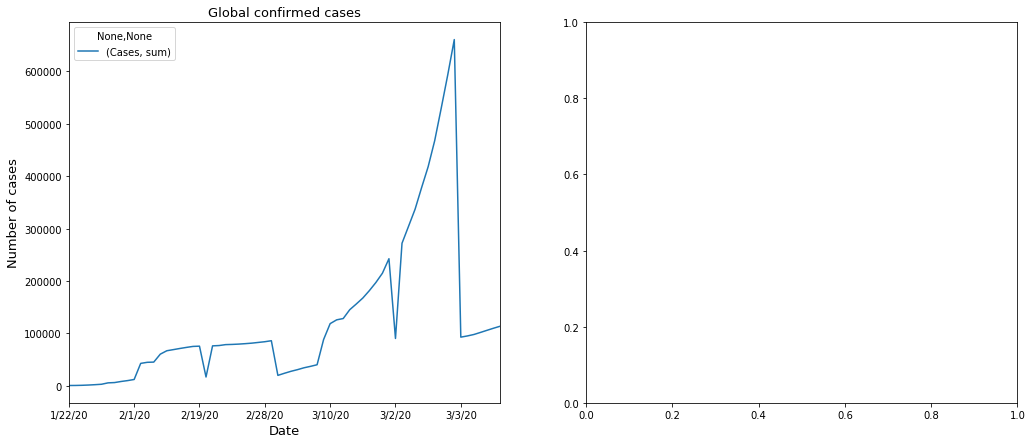

In [129]:
confirmed_drop_total_date = confirmed_drop.groupby(['Date']).agg({'Cases':['sum']})
fatalities_total_date = deaths.groupby(['Date']).agg({'Fatalities':['sum']})
total_drop_date = confirmed_drop_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
confirmed_drop_total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)

From all the analysis, regarding 3/2/2020 seems like the drop is not due to missing data. 

TIME SERIES ANALYSIS 

PROPHET TIME SERIES 

this is a test using all data from all countries

In [160]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

#Dataframe needs to have columns named  ds and y

In [166]:
confirmed.head()

Province/State Country/Region     Date  Cases
0            nan    Afghanistan  1/22/20      0
1            nan        Albania  1/22/20      0
2            nan        Algeria  1/22/20      0
3            nan        Andorra  1/22/20      0
4            nan         Angola  1/22/20      0

In [168]:
confirmed_prophet =confirmed.rename(columns = {'Date':'ds', 'Cases':'y'})

In [169]:
confirmed_prophet.head()

Province/State Country/Region       ds  y
0            nan    Afghanistan  1/22/20  0
1            nan        Albania  1/22/20  0
2            nan        Algeria  1/22/20  0
3            nan        Andorra  1/22/20  0
4            nan         Angola  1/22/20  0

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


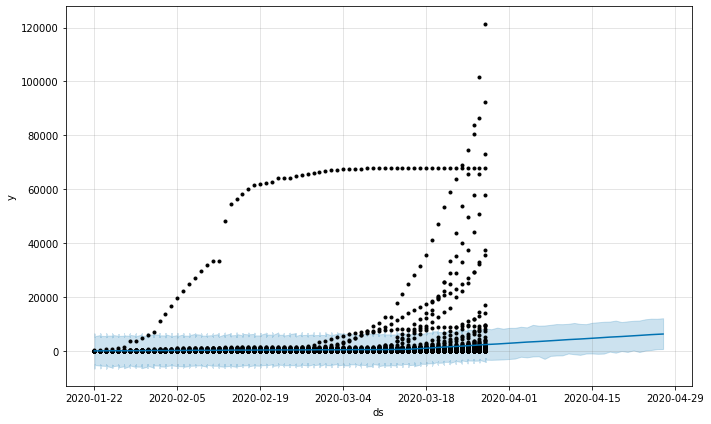

In [170]:
model = Prophet()
model.fit(confirmed_prophet)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)
plot1 = model.plot(forecast)

Now let's forecast only Costa Rica

In [176]:
costarica_prophet = confirmed.loc[confirmed['Country/Region'] == 'Costa Rica']

costarica_prophet.head()

Province/State Country/Region     Date  Cases
85              nan     Costa Rica  1/22/20      0
338             nan     Costa Rica  1/23/20      0
591             nan     Costa Rica  1/24/20      0
844             nan     Costa Rica  1/25/20      0
1097            nan     Costa Rica  1/26/20      0

In [177]:
costarica_prophet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 85 to 16783
Data columns (total 4 columns):
Province/State    67 non-null object
Country/Region    67 non-null object
Date              67 non-null object
Cases             67 non-null int64
dtypes: int64(1), object(3)
memory usage: 2.6+ KB


In [178]:
#again rename columns
costarica_prophet =costarica_prophet.rename(columns = {'Date':'ds', 'Cases':'y'})

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


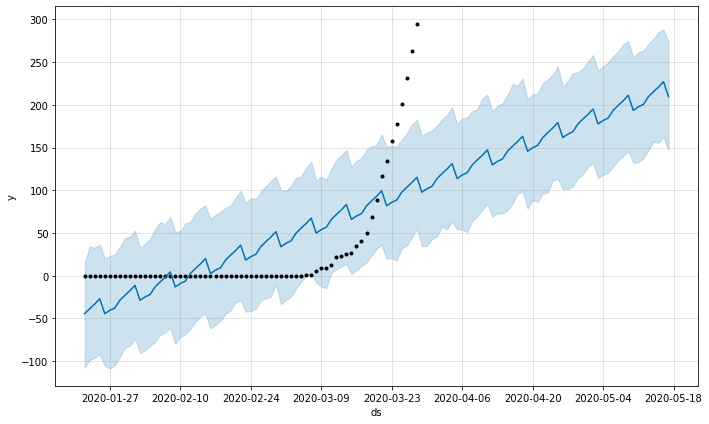

In [185]:
#Using default accuracy 80%
model_CR = Prophet()
model_CR.fit(costarica_prophet)
future_CR = model_CR.make_future_dataframe(periods=50)
forecast_CR = model_CR.predict(future_CR)
plotCR = model_CR.plot(forecast_CR)

In [180]:
costarica_prophet.tail()

Province/State Country/Region       ds    y
15771            nan     Costa Rica  3/24/20  177
16024            nan     Costa Rica  3/25/20  201
16277            nan     Costa Rica  3/26/20  231
16530            nan     Costa Rica  3/27/20  263
16783            nan     Costa Rica  3/28/20  295

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


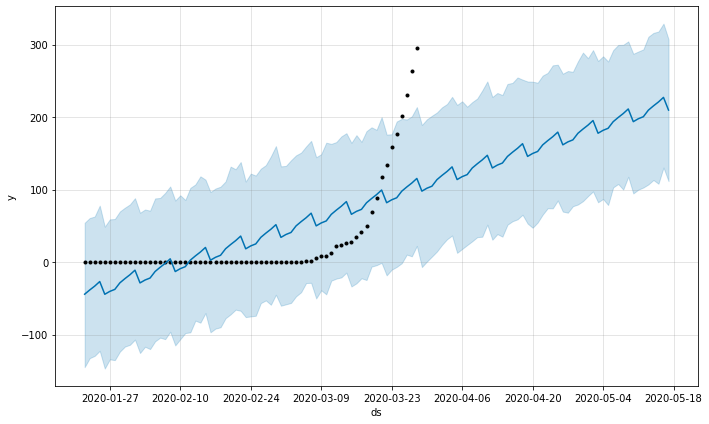

In [184]:
model_CR2 = Prophet(interval_width=0.95)
model_CR2.fit(costarica_prophet)
future_CR2 = model_CR2.make_future_dataframe(periods=50)
forecast_CR2 = model_CR2.predict(future_CR2)
plotCR2 = model_CR2.plot(forecast_CR2)

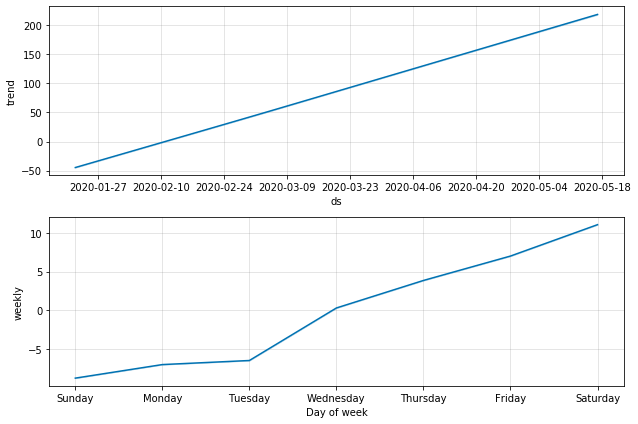

In [229]:
figCR = model_CR2.plot_components(forecast_CR2)

In [277]:
forecast_CR2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
112 2020-05-13  209.501533  107.082751  310.658373
113 2020-05-14  215.330565  113.209515  315.990616
114 2020-05-15  220.759541  108.048814  317.864416
115 2020-05-16  227.087682  130.397368  328.773949
116 2020-05-17  209.577290  111.601855  307.253501

In [285]:
forecast_CR2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds       yhat  yhat_lower  yhat_upper
0 2020-01-22 -44.312960 -144.898252   54.137163
1 2020-01-23 -38.526650 -132.515677   60.700392
2 2020-01-24 -33.140395 -129.324641   62.791538
3 2020-01-25 -26.854976 -122.395313   77.815992
4 2020-01-26 -44.408089 -146.833467   48.774754

In [279]:
#export csv forecast_CR2
forecast_CR2.to_csv('forecast_CR2.csv', header=True, index=False)

In [223]:
import ipywidgets as widgets
from ipywidgets import interact
from fbprophet.plot import plot_plotly
import plotly.offline as py
#import plotly.graph_objs as go
py.init_notebook_mode()
#from fbprophet\plot.py import plot_plotly

In [219]:
import plotly.graph_objs as go


In [224]:
plot_plotly(model_CR2, forecast_CR2)

plot_components_plotly(model_CR2, forecast_CR2)

NameError: name 'go' is not defined

Now let's forecast Italy

In [225]:
italy_prophet = confirmed.loc[confirmed['Country/Region'] == 'Italy']

italy_prophet.head()

Province/State Country/Region     Date  Cases
137             nan          Italy  1/22/20      0
390             nan          Italy  1/23/20      0
643             nan          Italy  1/24/20      0
896             nan          Italy  1/25/20      0
1149            nan          Italy  1/26/20      0

In [226]:
#again rename columns
italy_prophet = italy_prophet.rename(columns = {'Date':'ds', 'Cases':'y'})

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


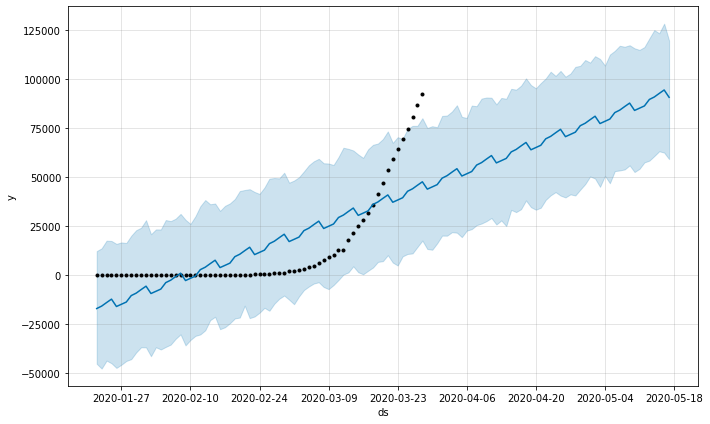

In [227]:
model_IT = Prophet(interval_width=0.95)
model_IT.fit(italy_prophet)
future_IT = model_IT.make_future_dataframe(periods=50)
forecast_IT = model_IT.predict(future_IT)
plotIT = model_IT.plot(forecast_IT)

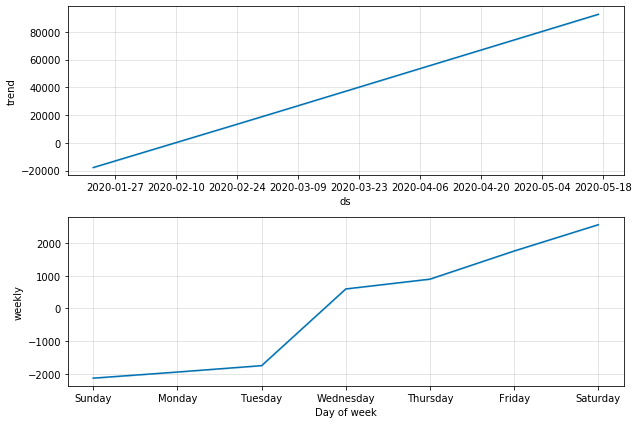

In [228]:
figIT = model_IT.plot_components(forecast_IT)

In [280]:
#export csv forecast_IT
forecast_IT.to_csv('forecast_IT.csv', header=True, index=False)

Now let's forecast Spain

In [230]:
spain_prophet = confirmed.loc[confirmed['Country/Region'] == 'Spain']

spain_prophet.head()

Province/State Country/Region     Date  Cases
201             nan          Spain  1/22/20      0
454             nan          Spain  1/23/20      0
707             nan          Spain  1/24/20      0
960             nan          Spain  1/25/20      0
1213            nan          Spain  1/26/20      0

In [231]:
#again rename columns
spain_prophet = spain_prophet.rename(columns = {'Date':'ds', 'Cases':'y'})

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


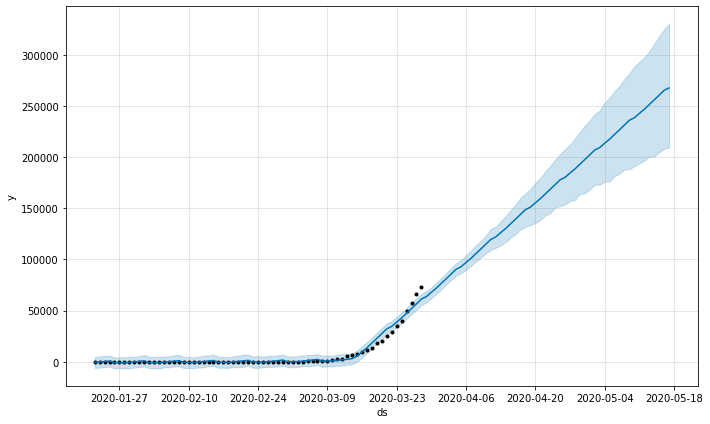

In [232]:
model_ES = Prophet(interval_width=0.95)
model_ES.fit(spain_prophet)
future_ES = model_ES.make_future_dataframe(periods=50)
forecast_ES = model_ES.predict(future_ES)
plotES = model_ES.plot(forecast_ES)

In [262]:
spain_prophet.tail()

Province/State Country/Region       ds      y
15887            nan          Spain  3/24/20  39885
16140            nan          Spain  3/25/20  49515
16393            nan          Spain  3/26/20  57786
16646            nan          Spain  3/27/20  65719
16899            nan          Spain  3/28/20  73235

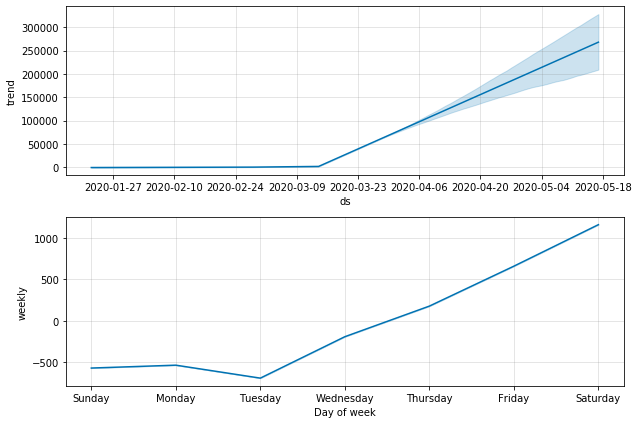

In [233]:
figES = model_ES.plot_components(forecast_ES)

In [281]:
#export csv forecast_ES
forecast_ES.to_csv('forecast_ES.csv', header=True, index=False)

Now let's forecast Singapore

In [250]:
singapore_prophet = confirmed.loc[confirmed['Country/Region'] == 'Singapore']

singapore_prophet.head()

Province/State Country/Region     Date  Cases
196             nan      Singapore  1/22/20      0
449             nan      Singapore  1/23/20      1
702             nan      Singapore  1/24/20      3
955             nan      Singapore  1/25/20      3
1208            nan      Singapore  1/26/20      4

In [251]:
#again rename columns
singapore_prophet = singapore_prophet.rename(columns = {'Date':'ds', 'Cases':'y'})

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


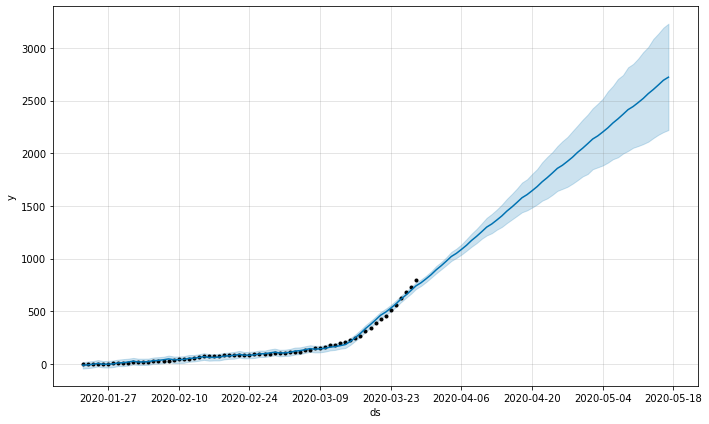

In [252]:
model_SGP = Prophet(interval_width=0.95)
model_SGP.fit(singapore_prophet)
future_SGP = model_SGP.make_future_dataframe(periods=50)
forecast_SGP = model_SGP.predict(future_SGP)
plotSGP = model_SGP.plot(forecast_SGP)

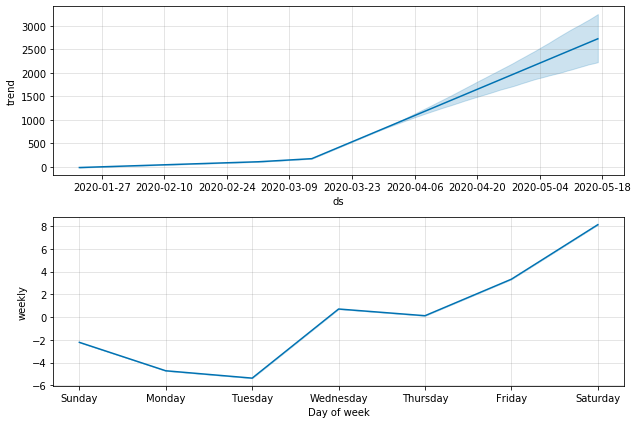

In [261]:
figSGP = model_SGP.plot_components(forecast_SGP)

In [282]:
#export csv forecast_SGP
forecast_SGP.to_csv('forecast_SGP.csv', header=True, index=False)

Now let's forecast Singapore

In [257]:
usa_prophet = confirmed.loc[confirmed['Country/Region'] == 'US']
usa_prophet

Province/State Country/Region     Date   Cases
225              nan             US  1/22/20       1
478              nan             US  1/23/20       1
731              nan             US  1/24/20       2
984              nan             US  1/25/20       2
1237             nan             US  1/26/20       5
...              ...            ...      ...     ...
15911            nan             US  3/24/20   53740
16164            nan             US  3/25/20   65778
16417            nan             US  3/26/20   83836
16670            nan             US  3/27/20  101657
16923            nan             US  3/28/20  121478

[67 rows x 4 columns]

In [258]:
#again rename columns
usa_prophet = usa_prophet.rename(columns = {'Date':'ds', 'Cases':'y'})

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


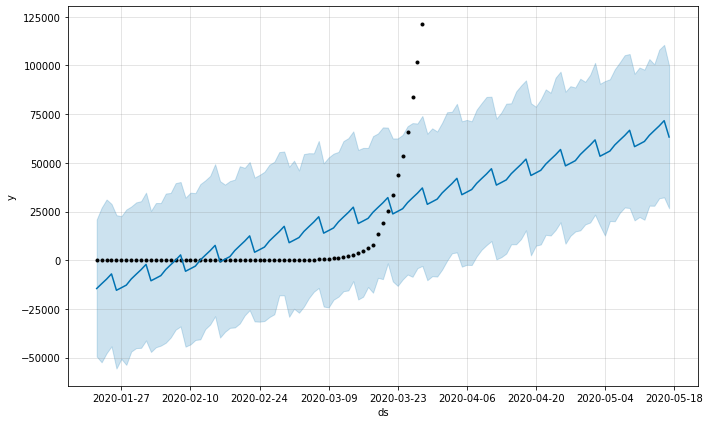

In [259]:
model_USA = Prophet(interval_width=0.95)
model_USA.fit(usa_prophet)
future_USA = model_USA.make_future_dataframe(periods=50)
forecast_USA = model_USA.predict(future_USA)
plotUSA = model_USA.plot(forecast_USA)

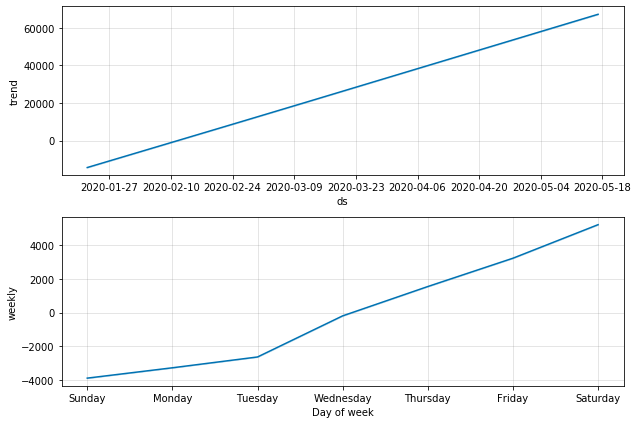

In [260]:
figUSA = model_USA.plot_components(forecast_USA)

In [283]:
#export csv forecast_USA
forecast_USA.to_csv('forecast_USA.csv', header=True, index=False)

Performance metrics

In [300]:
# Python
from fbprophet.diagnostics import cross_validation
cv_costarica = cross_validation(model_CR2, initial='7 days', period='50 days', horizon = '50 days')
cv_costarica.head()


INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-02-07 00:00:00 and 2020-02-07 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


ds  yhat    yhat_lower    yhat_upper  y     cutoff
0 2020-02-08   0.0 -2.069869e-09  2.288136e-09  0 2020-02-07
1 2020-02-09   0.0 -3.305968e-09  3.008515e-09  0 2020-02-07
2 2020-02-10   0.0 -5.276096e-09  5.169266e-09  0 2020-02-07
3 2020-02-11   0.0 -7.379732e-09  8.049912e-09  0 2020-02-07
4 2020-02-12   0.0 -9.649903e-09  1.112388e-08  0 2020-02-07

In [263]:
# Python
from fbprophet.diagnostics import performance_metrics


In [304]:
cv_CR2 = forecast_CR2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
print(cv_CR2)

            ds        yhat  yhat_lower  yhat_upper
0   2020-01-22  -44.312960 -144.898252   54.137163
1   2020-01-23  -38.526650 -132.515677   60.700392
2   2020-01-24  -33.140395 -129.324641   62.791538
3   2020-01-25  -26.854976 -122.395313   77.815992
4   2020-01-26  -44.408089 -146.833467   48.774754
..         ...         ...         ...         ...
112 2020-05-13  209.501533  107.082751  310.658373
113 2020-05-14  215.330565  113.209515  315.990616
114 2020-05-15  220.759541  108.048814  317.864416
115 2020-05-16  227.087682  130.397368  328.773949
116 2020-05-17  209.577290  111.601855  307.253501

[117 rows x 4 columns]


In [301]:

performance_CR = performance_metrics(cv_costarica)
performance_CR.head()

INFO:fbprophet:Skipping MAPE because y close to 0


horizon  mse  rmse  mae  mdape  coverage
0  5 days  0.0   0.0  0.0    NaN       1.0
1  6 days  0.0   0.0  0.0    NaN       1.0
2  7 days  0.0   0.0  0.0    NaN       1.0
3  8 days  0.0   0.0  0.0    NaN       1.0
4  9 days  0.0   0.0  0.0    NaN       1.0

In [373]:
from fbprophet.plot import plot_cross_validation_metric
#figCRper = plot_cross_validation_metric(cv_CR2, metric='mape')
#did not work

Performance Singapore

In [306]:
cv_SGP = cross_validation(model_SGP, initial='7 days', period='50 days', horizon = '50 days')
cv_SGP.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-02-07 00:00:00 and 2020-02-07 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


ds       yhat  yhat_lower  yhat_upper   y     cutoff
0 2020-02-08  30.228049   26.772858   33.942449  33 2020-02-07
1 2020-02-09  31.729508   28.166956   35.561309  40 2020-02-07
2 2020-02-10  32.231294   28.577050   35.850290  45 2020-02-07
3 2020-02-11  36.231259   32.583252   40.025485  47 2020-02-07
4 2020-02-12  39.303042   35.706029   42.986293  50 2020-02-07

In [307]:
performance_SGP = performance_metrics(cv_SGP)
performance_SGP.head()

horizon         mse       rmse        mae      mape     mdape  coverage
0  5 days   93.903061   9.690359   9.055370  0.203514  0.213939       0.2
1  6 days  152.652993  12.355282  11.973347  0.246583  0.229122       0.0
2  7 days  254.439836  15.951170  15.124809  0.276955  0.283749       0.0
3  8 days  378.080650  19.444296  18.161216  0.297846  0.299342       0.0
4  9 days  528.339536  22.985638  21.897324  0.330553  0.358624       0.0

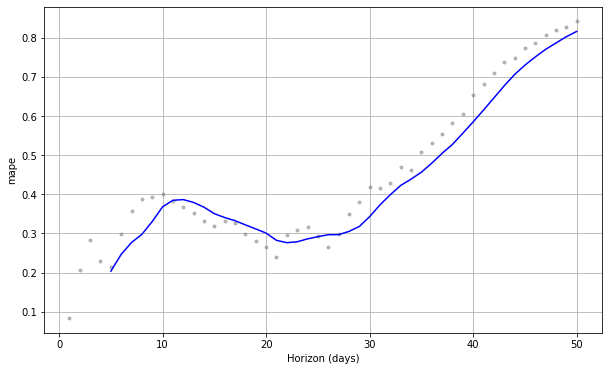

In [308]:
figSGPper = plot_cross_validation_metric(cv_SGP, metric='mape')


Performance United States 

In [309]:
cv_USA = cross_validation(model_USA, initial='7 days', period='50 days', horizon = '50 days')
cv_USA.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-02-07 00:00:00 and 2020-02-07 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


ds       yhat  yhat_lower  yhat_upper   y     cutoff
0 2020-02-08  12.403839   11.394600   13.454403  11 2020-02-07
1 2020-02-09  13.903721   12.741203   15.005283  11 2020-02-07
2 2020-02-10  15.403728   14.240215   16.541055  11 2020-02-07
3 2020-02-11  15.403685   14.267872   16.491776  12 2020-02-07
4 2020-02-12  15.538804   14.377622   16.635868  12 2020-02-07

In [310]:
performance_USA = performance_metrics(cv_USA)
performance_USA.head()

horizon        mse      rmse       mae      mape    mdape  coverage
0  5 days  10.780677  3.283394  3.130755  0.274095  0.28364       0.0
1  6 days  11.675606  3.416959  3.357744  0.287629  0.28364       0.0
2  7 days  12.493858  3.534665  3.484753  0.289277  0.28364       0.0
3  8 days  12.382529  3.518882  3.472020  0.275979  0.28364       0.0
4  9 days  16.886514  4.109320  3.959273  0.309096  0.29490       0.0

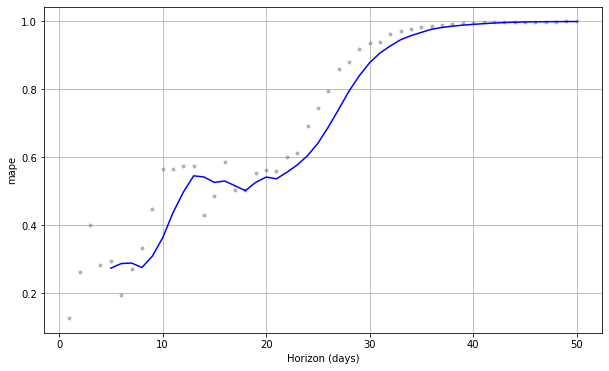

In [311]:
figUSAper = plot_cross_validation_metric(cv_USA, metric='mape')


Performance Italy

In [312]:
cv_IT = cross_validation(model_IT, initial='7 days', period='50 days', horizon = '50 days')
cv_IT.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-02-07 00:00:00 and 2020-02-07 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


ds      yhat  yhat_lower  yhat_upper  y     cutoff
0 2020-02-08  3.061424    2.285681    3.815209  3 2020-02-07
1 2020-02-09  3.061429    2.264647    3.856906  3 2020-02-07
2 2020-02-10  3.061434    2.278348    3.856263  3 2020-02-07
3 2020-02-11  3.061440    2.230934    3.842855  3 2020-02-07
4 2020-02-12  3.415224    2.553588    4.214378  3 2020-02-07

In [313]:
performance_IT = performance_metrics(cv_IT)
performance_IT.head()

horizon       mse      rmse       mae      mape     mdape  coverage
0  5 days  0.037501  0.193652  0.132190  0.044063  0.020478       1.0
1  6 days  0.071229  0.266888  0.202951  0.067650  0.020480       1.0
2  7 days  0.471040  0.686324  0.473708  0.157903  0.138408       0.8
3  8 days  0.882527  0.939429  0.748559  0.249520  0.138409       0.6
4  9 days  1.294017  1.137549  1.023410  0.341137  0.471738       0.4

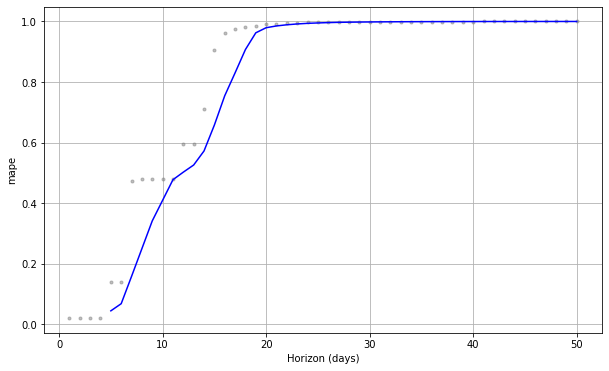

In [314]:
figITper = plot_cross_validation_metric(cv_IT, metric='mape')


Performance Spain 

In [315]:
cv_ES = cross_validation(model_ES, initial='7 days', period='50 days', horizon = '50 days')
cv_ES.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-02-07 00:00:00 and 2020-02-07 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


ds      yhat  yhat_lower  yhat_upper  y     cutoff
0 2020-02-08  1.437196    0.986715    1.911102  1 2020-02-07
1 2020-02-09  1.437345    1.002650    1.852493  2 2020-02-07
2 2020-02-10  1.437493    1.027395    1.884114  2 2020-02-07
3 2020-02-11  1.437642    1.005460    1.883578  2 2020-02-07
4 2020-02-12  1.582938    1.137179    2.042554  2 2020-02-07

In [316]:
performance_ES = performance_metrics(cv_ES)
performance_ES.head()

horizon       mse      rmse       mae      mape     mdape  coverage
0  5 days  0.262864  0.512703  0.508356  0.297897  0.281253       0.4
1  6 days  0.259408  0.509321  0.504308  0.252154  0.281179       0.4
2  7 days  0.230840  0.480458  0.475142  0.237571  0.208531       0.6
3  8 days  0.168317  0.410265  0.374973  0.187486  0.208480       0.8
4  9 days  0.105832  0.325319  0.274863  0.137431  0.208412       1.0

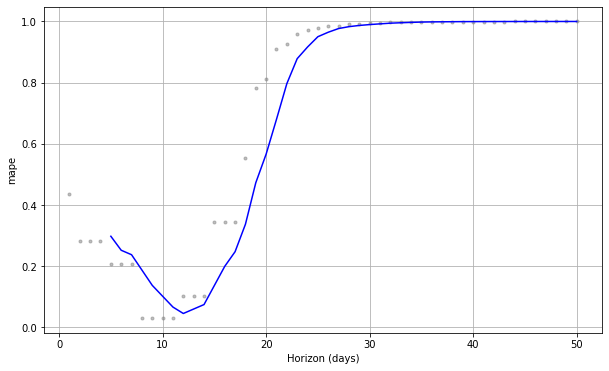

In [317]:
figESper = plot_cross_validation_metric(cv_ES, metric='mape')
